In [1]:
import wandb

print(wandb.__file__)
wandb.login()

C:\Users\Darren\miniconda3\envs\ctgan\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\Darren\miniconda3\envs\ctgan\lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
C:\Users\Darren\miniconda3\envs\ctgan\lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function,

C:\Users\Darren\miniconda3\envs\ctgan\lib\site-packages\wandb\__init__.py


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


True

In [7]:
import sys
print(sys.executable)
wandb.login()

C:\Users\Darren\miniconda3\envs\segpenis\python.exe


AttributeError: module 'wandb' has no attribute 'login'

In [3]:
import random
import wandb
# Start a new wandb run to track this script.
run = wandb.init(
    # Set the wandb entity where your project will be logged (generally your team name).
    entity="",
    # Set the wandb project where this run will be logged.
    project="ctgan",
    # Track hyperparameters and run metadata.
    config={
        "learning_rate": 0.02,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": 10,
    },
)

# Simulate training.
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2**-epoch - random.random() / epoch - offset
    loss = 2**-epoch + random.random() / epoch + offset

    # Log metrics to wandb.
    run.log({"acc": acc, "loss": loss})

# Finish the run and upload any remaining data.
run.finish()

wandb: Currently logged in as: farren (farren-ucla) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


acc,▁▄▅██▇▇█
loss,█▆▂▁▂▁▁▁
acc,0.93523
loss,0.05342


In [11]:
from sdv.metadata import Metadata
from sdv.datasets.local import load_csvs
from sdv.single_table import CTGANSynthesizer
from sdv.sampling import DataFrameCondition
import pandas as pd
import glob
import os

os.chdir(r'C:/Users/Darren/Documents/BHI and Written Qualifier')
data_dir = 'zufferey_data_reformatted/'
ctgan_dir = 'ctgan/'


data = [pd.read_csv(filepath) for filepath in glob.glob(data_dir + '*.csv')]
for df in data:
    # df.drop('Unnamed: 0', axis = 1, inplace = True)
    # df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y=%m-%d %H:%M')
    df.drop('user_id', axis = 1, inplace = True)
    df.dropna(inplace = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

data = pd.concat(data, axis = 0, ignore_index = False)
metadata = Metadata.detect_from_dataframe(data=data)
print(metadata.to_dict())
metadata.save_to_json(filepath = ctgan_dir + 'metadata.json', mode = 'overwrite')

synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=True,
    epochs = 200,
    verbose = True,
    cuda = True
)
synthesizer.fit(data)

# results_dir = 'ctgan/synthetic_data_samples/'
synthesizer.save(filepath='ctgan_200_epochs_zufferey.pkl')


In [8]:
fig = synthesizer.get_loss_values_plot()
fig.show()

In [5]:
import pandas as pd
from datetime import datetime
from sdv.sampling import DataFrameCondition
from sdv.utils import load_synthesizer

synthesizer = load_synthesizer(filepath = 'ctgan_200_epochs_zufferey.pkl')

output_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan\samples_zufferey'
os.makedirs(output_dir, exist_ok = True)

for i in range(100):
    synthetic_data = synthesizer.sample(num_rows = 20000, output_file_path = os.path.join(output_dir, f'SynthUser{i}.csv'))
    # synthetic_data = synthesizer.sample_from_conditions(conditions = [datetime_condition], output_file_path = os.path.join(output_dir, f'SynthUser{i}.csv'))



# TVAE

In [12]:
from sdv.single_table import TVAESynthesizer

tvae = TVAESynthesizer(
    metadata,
    enforce_rounding=True,
    epochs = 200,
    verbose = True,
    cuda = True
)
tvae.fit(data)
tvae.save(filepath='tvae_200_epochs_zufferey.pkl')

loss_vals = tvae.get_loss_values()
loss_vals

Loss: -0.763: 100%|██████████| 200/200 [00:20<00:00,  9.71it/s]


,Epoch,Batch,Loss
0,0,0,34.654099
1,0,1,29.317217
2,0,2,29.487835
3,0,3,29.749853
4,0,4,30.454094
...,...,...,...
3595,199,13,-1.615523
3596,199,14,-1.623404
3597,199,15,-2.140114
3598,199,16,-1.778904


In [13]:
import pandas as pd
from datetime import datetime
from sdv.sampling import DataFrameCondition
from sdv.utils import load_synthesizer

tvae = load_synthesizer(filepath = 'tvae_200_epochs_zufferey.pkl')

output_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\tvae\samples_zufferey'
os.makedirs(output_dir, exist_ok = True)

for i in range(100):
    synthetic_data = tvae.sample(num_rows = 20000, output_file_path = os.path.join(output_dir, f'SynthUser{i}.csv'))
    # synthetic_data = synthesizer.sample_from_conditions(conditions = [datetime_condition], output_file_path = os.path.join(output_dir, f'SynthUser{i}.csv'))

In [15]:
# Iterate over all CSV files in the directory
data_dir = 'ctgan/samples_zufferey/'
for file in glob.glob(os.path.join(data_dir, "*.csv")):
    print(f"Processing: {file}")

    # try:
    #     # Read CSV
    #     df = pd.read_csv(file)
    #
    #     # Ensure 'Datetime' exists
    #     if 'Datetime' not in df.columns:
    #         print(f"⚠️ Skipping {file}: no 'Datetime' column found.")
    #         continue
    #
    #     # Convert to datetime and drop invalid rows
    #     df['Datetime'] = pd.to_datetime(df['Datetime'])
    #     df = df.dropna(subset=['Datetime'])
    #
    #     # Drop duplicates (keep first)
    #     df = df.drop_duplicates(subset=['Datetime'], keep='first')
    #
    #     # Sort by datetime
    #     df = df.sort_values(by='Datetime').reset_index(drop=True)
    #
    #     # Save back to same file (overwrite)
    #     df.to_csv(file, index=False)
    #     print(f"✅ Saved sorted file: {file}")
    #
    # except Exception as e:
    #     print(f"❌ Error processing {file}: {e}")
    try:
        # Read CSV
        df = pd.read_csv(file)

        # Ensure 'Datetime' exists
        if 'timestamp' not in df.columns:
            print(f"⚠️ Skipping {file}: no 'timestamp' column found.")
            continue

        # Convert to datetime and drop invalid rows
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.dropna(subset=['timestamp'])

        # Drop duplicates (keep first)
        df = df.drop_duplicates(subset=['timestamp'], keep='first')

        # Sort by datetime
        df = df.sort_values(by='timestamp').reset_index(drop=True)

        # Save back to same file (overwrite)
        df.to_csv(file, index=False)
        print(f"✅ Saved sorted file: {file}")

    except Exception as e:
        print(f"❌ Error processing {file}: {e}")

Processing: ctgan/samples_zufferey\SynthUser0.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser0.csv
Processing: ctgan/samples_zufferey\SynthUser1.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser1.csv
Processing: ctgan/samples_zufferey\SynthUser10.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser10.csv
Processing: ctgan/samples_zufferey\SynthUser11.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser11.csv
Processing: ctgan/samples_zufferey\SynthUser12.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser12.csv
Processing: ctgan/samples_zufferey\SynthUser13.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser13.csv
Processing: ctgan/samples_zufferey\SynthUser14.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser14.csv
Processing: ctgan/samples_zufferey\SynthUser15.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser15.csv
Processing: ctgan/samples_zufferey\SynthUser16.csv
✅ Saved sorted file: ctgan/samples_zufferey\SynthUser16.csv
Proce

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance, ks_2samp, entropy
from scipy.spatial.distance import jensenshannon
from sklearn.metrics import pairwise_distances
import itertools
import glob
import os

os.chdir(r'C:/Users/Darren/Documents/BHI and Written Qualifier')


# ========== CONFIGURATION ==========

# Variables of interest
variables = [
    "Activity_Type",
    "Heart rate___beats/minute",
    "Calories burned_kcal",
    "Exercise duration_s",
    "Sleep duration_minutes",
    "Sleep type duration_minutes",
    "Floors climbed___floors"
]

# ========== HELPER FUNCTIONS ==========

def compute_jsd(p, q, bins=50):
    """Compute Jensen–Shannon Divergence for continuous data."""
    hist_range = (min(p.min(), q.min()), max(p.max(), q.max()))
    p_hist, _ = np.histogram(p, bins=bins, range=hist_range, density=True)
    q_hist, _ = np.histogram(q, bins=bins, range=hist_range, density=True)
    p_hist /= p_hist.sum()
    q_hist /= q_hist.sum()
    jsd = jensenshannon(p_hist, q_hist, base=2) ** 2
    return jsd


def distance_correlation(x, y, random_state=None):
    """
    Compute distance correlation between two 1D arrays.
    If lengths differ, randomly subsample the larger array to match the smaller one.
    """
    x, y = np.asarray(x), np.asarray(y)

    # Handle unequal lengths
    if len(x) != len(y):
        n = min(len(x), len(y))
        rng = np.random.default_rng(random_state)
        if len(x) > len(y):
            x = rng.choice(x, size=n, replace=False)
        else:
            y = rng.choice(y, size=n, replace=False)

    # Ensure 2D shape for pairwise distances
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Compute pairwise distance matrices
    a = pairwise_distances(x)
    b = pairwise_distances(y)

    # Double centering
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()

    # Compute distance covariance and variances
    dcov = np.sqrt((A * B).mean())
    dvar_x = np.sqrt((A * A).mean())
    dvar_y = np.sqrt((B * B).mean())

    # Return distance correlation
    return 0.0 if dvar_x * dvar_y == 0 else dcov / np.sqrt(dvar_x * dvar_y)

def compare_data(df1, df2, match_datetimes = False, input = 'real'):

    # Ensure both contain the same columns
    missing_cols = [v for v in variables if v not in df1.columns or v not in df2.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in one or both CSVs: {missing_cols}")

    # --- Check and convert datetime columns ---
    if 'Datetime' not in df1.columns or 'Datetime' not in df2.columns:
        raise ValueError("Both CSVs must contain a 'Datetime' column for alignment.")

    # Convert to pandas datetime (handles mixed formats automatically)
    format = '%Y=%m-%d %H:%M'
    if input == 'synth':
        format = '%Y-%m-%d %H:%M:%S'
    df1['Datetime'] = pd.to_datetime(df1['Datetime'], format=format )
    df2['Datetime'] = pd.to_datetime(df2['Datetime'], format='%Y=%m-%d %H:%M')

    # Drop rows with invalid datetimes
    df1 = df1.dropna(subset=['Datetime'])
    df2 = df2.dropna(subset=['Datetime'])

    # Drop duplicate timestamps (keep the first occurrence)
    df1 = df1.drop_duplicates(subset=['Datetime'], keep='first')
    df2 = df2.drop_duplicates(subset=['Datetime'], keep='first')

    # --- Align df1 to df2's timestamps ---
    # (Assuming exact timestamp matches are desired)
    if match_datetimes:
        df1 = df1[df1['Datetime'].isin(df2['Datetime'])].reset_index(drop=True)

    # ========== COMPUTE STATISTICS ==========

    results = []

    for var in variables:
        x = df1[var].dropna()
        y = df2[var].dropna()

        # Skip if either is empty
        if len(x) == 0 or len(y) == 0:
            print(f"Skipping {var}: one or both DataFrames are empty.")
            results.append((var, np.nan, np.nan, np.nan, np.nan))
            continue

        # Decide metric type
        if var == "Activity_Type" or x.dtype == object:
            # Discrete / categorical → JSD only
            p = x.value_counts(normalize=True)
            q = y.value_counts(normalize=True)
            common_idx = p.index.union(q.index)
            p = p.reindex(common_idx, fill_value=0)
            q = q.reindex(common_idx, fill_value=0)
            jsd = jensenshannon(p, q)
            results.append((var, np.nan, np.nan, jsd, np.nan))
        else:
            # Continuous → Wasserstein, KS, JSD, Distance correlation
            w = wasserstein_distance(x, y)
            ks = ks_2samp(x, y).statistic
            jsd = compute_jsd(x, y)
            dcorr = distance_correlation(x.values, y.values)
            results.append((var, w, ks, jsd, dcorr))

    # ========== OUTPUT RESULTS ==========

    results_df = pd.DataFrame(
        results,
        columns=["Variable", "Wasserstein", "KS_statistic", "JSD", "Distance_correlation"]
    )

    return results_df

activity_state_dict = {
    0: 'No Physical Activity',
    1: 'REM Sleep',
    2: 'Light Sleep',
    3: 'Running',
    4: 'Walking',
    5: 'Floors Climbed'
}

comparison_result_list = []
base_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan'
activity_state_dict_inverse = {val:key for key, val in activity_state_dict.items()}
sim_dir = 'samples'
sim_data = [pd.read_csv(filepath) for filepath in glob.glob(os.path.join(base_dir, sim_dir, '*.csv'))]
ref_data = [pd.read_csv(filepath) for filepath in glob.glob(os.path.join('SyntheticDataFixed','*.csv'))]
# print(sim_data)
for df in sim_data:
    for ref_df in ref_data:
        df_copy = df.copy()
        ref_df_copy = ref_df.copy()
        df_copy['Activity_Type'] = df_copy['Activity_Type'].map(activity_state_dict_inverse)
        ref_df_copy['Activity_Type'] = ref_df_copy['Activity_Type'].map(activity_state_dict_inverse)
        results_df = compare_data(df_copy, ref_df_copy, match_datetimes = False, input = 'synth')
        comparison_result_list.append(results_df)

avg_comparison_result_df = pd.concat(comparison_result_list).groupby('Variable').mean().reset_index()
std_comparison_result_df = pd.concat(comparison_result_list).groupby('Variable').std().reset_index()
results_dir = 'results_ctgan'
os.makedirs(results_dir, exist_ok = True)
avg_comparison_result_df.to_csv(os.path.join(results_dir, f'{sim_dir}_avg.csv'), index=False)
std_comparison_result_df.to_csv(os.path.join(results_dir, f'{sim_dir}_std.csv'), index=False)


In [7]:
#Zufferey val

import os
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance, ks_2samp, entropy
from scipy.spatial.distance import jensenshannon
from itertools import product

def distance_correlation(x, y):
    """Compute distance correlation between two 1D arrays."""
    x, y = np.atleast_1d(x), np.atleast_1d(y)
    if len(x) != len(y):
        n = min(len(x), len(y))
        x, y = x[:n], y[:n]
    a = np.abs(x[:, None] - x[None, :])
    b = np.abs(y[:, None] - y[None, :])
    A = a - a.mean(0)[None, :] - a.mean(1)[:, None] + a.mean()
    B = b - b.mean(0)[None, :] - b.mean(1)[:, None] + b.mean()
    dcov2_xy = (A * B).mean()
    dcov2_xx = (A * A).mean()
    dcov2_yy = (B * B).mean()
    if dcov2_xx * dcov2_yy == 0:
        return 0
    return np.sqrt(dcov2_xy / np.sqrt(dcov2_xx * dcov2_yy))

def label_encode(series):
    """Label encode string columns (activity) numerically."""
    return pd.factorize(series)[0].astype(float)

def compute_jsd(p, q, bins=50):
    """Compute Jensen–Shannon distance between two 1D arrays."""
    p_hist, _ = np.histogram(p, bins=bins, density=True)
    q_hist, _ = np.histogram(q, bins=bins, density=True)
    p_hist += 1e-12
    q_hist += 1e-12
    p_hist /= p_hist.sum()
    q_hist /= q_hist.sum()
    return jensenshannon(p_hist, q_hist)

def compare_dirs(reference_dir, synth_dir, match_datetimes = False, output_dir="metrics_output"):
    os.makedirs(output_dir, exist_ok=True)


    metrics = ['Wasserstein', 'KS', 'JSD', 'DistCorr']
    variables = ['heartrate', 'activity', 'step_count', 'activity_duration']
    results = {m: [] for m in metrics}
    ref_files = [os.path.join(reference_dir, f) for f in os.listdir(reference_dir) if f.endswith('.csv')]
    synth_files = [os.path.join(synth_dir, f) for f in os.listdir(synth_dir) if f.endswith('.csv')]

    for ref_path, synth_path in product(ref_files, synth_files):
        print(f"Comparing {os.path.basename(ref_path)} ↔ {os.path.basename(synth_path)}...")
        if synth_path == ref_path:
            continue
        try:
            ref_df = pd.read_csv(ref_path)
            synth_df = pd.read_csv(synth_path)
            if 'Datetime' in synth_df.columns:
                synth_df['timestamp'] = synth_df['Datetime']
            if match_datetimes:
                synth_df = synth_df[synth_df['timestamp'].isin(ref_df['timestamp'])].reset_index(drop=True)
            # Drop NAs and encode
            ref_df = ref_df.dropna(subset=variables)
            synth_df = synth_df.dropna(subset=variables)
            ref_df['activity'] = label_encode(ref_df['activity'])
            synth_df['activity'] = label_encode(synth_df['activity'])

            row_ids = f"{os.path.basename(ref_path)}__vs__{os.path.basename(synth_path)}"
            metric_vals = {m: {'Comparison': row_ids} for m in metrics}

            for var in variables:
                x = (ref_df[var].dropna()).values
                y = (synth_df[var].dropna()).values
                n = min(len(x), len(y))
                x, y = x[:n], y[:n]

                metric_vals['Wasserstein'][var] = wasserstein_distance(x, y)
                metric_vals['KS'][var] = ks_2samp(x, y).statistic
                metric_vals['JSD'][var] = compute_jsd(x, y)
                metric_vals['DistCorr'][var] = distance_correlation(x, y)

            for m in metrics:
                results[m].append(metric_vals[m])
        except:
            continue

    # Save one CSV per metric
    for m in metrics:
        df_metric = pd.DataFrame(results[m])
        df_metric.to_csv(os.path.join(output_dir, f"{m}_results.csv"), index=False)
        print(f"Saved {m}_results.csv with {len(df_metric)} comparisons.")

    print(f"\nAll metric CSVs saved to: {os.path.abspath(output_dir)}")

reference_dir = r"C:\Users\Darren\Documents\BHI and Written Qualifier\zufferey_data_reformatted"
synth_dir = r"C:\Users\Darren\Documents\BHI and Written Qualifier\zufferey_synth_data"

compare_dirs(reference_dir, synth_dir, match_datetimes = True, output_dir = 'heated_markov_model_results')
# print(df_results)
# df_results.to_csv("ctgan/comparison_summary_zufferey.csv", index=False)


Comparing User1.csv ↔ SynthUser0.csv...
Comparing User1.csv ↔ SynthUser1.csv...
Comparing User1.csv ↔ SynthUser10.csv...
Comparing User1.csv ↔ SynthUser11.csv...
Comparing User1.csv ↔ SynthUser12.csv...
Comparing User1.csv ↔ SynthUser13.csv...
Comparing User1.csv ↔ SynthUser14.csv...
Comparing User1.csv ↔ SynthUser15.csv...
Comparing User1.csv ↔ SynthUser16.csv...
Comparing User1.csv ↔ SynthUser17.csv...
Comparing User1.csv ↔ SynthUser18.csv...
Comparing User1.csv ↔ SynthUser19.csv...
Comparing User1.csv ↔ SynthUser2.csv...
Comparing User1.csv ↔ SynthUser20.csv...
Comparing User1.csv ↔ SynthUser21.csv...
Comparing User1.csv ↔ SynthUser22.csv...
Comparing User1.csv ↔ SynthUser23.csv...
Comparing User1.csv ↔ SynthUser24.csv...
Comparing User1.csv ↔ SynthUser25.csv...
Comparing User1.csv ↔ SynthUser26.csv...
Comparing User1.csv ↔ SynthUser27.csv...
Comparing User1.csv ↔ SynthUser28.csv...
Comparing User1.csv ↔ SynthUser29.csv...
Comparing User1.csv ↔ SynthUser3.csv...
Comparing User1.csv 

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User1.csv ↔ SynthUser96.csv...
Comparing User1.csv ↔ SynthUser97.csv...
Comparing User1.csv ↔ SynthUser98.csv...
Comparing User1.csv ↔ SynthUser99.csv...
Comparing User10.csv ↔ SynthUser0.csv...
Comparing User10.csv ↔ SynthUser1.csv...
Comparing User10.csv ↔ SynthUser10.csv...
Comparing User10.csv ↔ SynthUser11.csv...
Comparing User10.csv ↔ SynthUser12.csv...
Comparing User10.csv ↔ SynthUser13.csv...
Comparing User10.csv ↔ SynthUser14.csv...
Comparing User10.csv ↔ SynthUser15.csv...
Comparing User10.csv ↔ SynthUser16.csv...
Comparing User10.csv ↔ SynthUser17.csv...
Comparing User10.csv ↔ SynthUser18.csv...
Comparing User10.csv ↔ SynthUser19.csv...
Comparing User10.csv ↔ SynthUser2.csv...
Comparing User10.csv ↔ SynthUser20.csv...
Comparing User10.csv ↔ SynthUser21.csv...
Comparing User10.csv ↔ SynthUser22.csv...
Comparing User10.csv ↔ SynthUser23.csv...
Comparing User10.csv ↔ SynthUser24.csv...
Comparing User10.csv ↔ SynthUser25.csv...
Comparing User10.csv ↔ SynthUser26.csv...

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User53.csv ↔ SynthUser20.csv...
Comparing User53.csv ↔ SynthUser21.csv...
Comparing User53.csv ↔ SynthUser22.csv...
Comparing User53.csv ↔ SynthUser23.csv...
Comparing User53.csv ↔ SynthUser24.csv...
Comparing User53.csv ↔ SynthUser25.csv...
Comparing User53.csv ↔ SynthUser26.csv...
Comparing User53.csv ↔ SynthUser27.csv...
Comparing User53.csv ↔ SynthUser28.csv...
Comparing User53.csv ↔ SynthUser29.csv...
Comparing User53.csv ↔ SynthUser3.csv...
Comparing User53.csv ↔ SynthUser30.csv...
Comparing User53.csv ↔ SynthUser31.csv...
Comparing User53.csv ↔ SynthUser32.csv...
Comparing User53.csv ↔ SynthUser33.csv...
Comparing User53.csv ↔ SynthUser34.csv...
Comparing User53.csv ↔ SynthUser35.csv...
Comparing User53.csv ↔ SynthUser36.csv...
Comparing User53.csv ↔ SynthUser37.csv...
Comparing User53.csv ↔ SynthUser38.csv...
Comparing User53.csv ↔ SynthUser39.csv...
Comparing User53.csv ↔ SynthUser4.csv...
Comparing User53.csv ↔ SynthUser40.csv...
Comparing User53.csv ↔ SynthUser41.c

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User53.csv ↔ SynthUser57.csv...
Comparing User53.csv ↔ SynthUser58.csv...
Comparing User53.csv ↔ SynthUser59.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User53.csv ↔ SynthUser6.csv...
Comparing User53.csv ↔ SynthUser60.csv...
Comparing User53.csv ↔ SynthUser61.csv...
Comparing User53.csv ↔ SynthUser62.csv...
Comparing User53.csv ↔ SynthUser63.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User53.csv ↔ SynthUser64.csv...
Comparing User53.csv ↔ SynthUser65.csv...
Comparing User53.csv ↔ SynthUser66.csv...
Comparing User53.csv ↔ SynthUser67.csv...
Comparing User53.csv ↔ SynthUser68.csv...
Comparing User53.csv ↔ SynthUser69.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User53.csv ↔ SynthUser7.csv...
Comparing User53.csv ↔ SynthUser70.csv...
Comparing User53.csv ↔ SynthUser71.csv...
Comparing User53.csv ↔ SynthUser72.csv...
Comparing User53.csv ↔ SynthUser73.csv...
Comparing User53.csv ↔ SynthUser74.csv...
Comparing User53.csv ↔ SynthUser75.csv...
Comparing User53.csv ↔ SynthUser76.csv...
Comparing User53.csv ↔ SynthUser77.csv...
Comparing User53.csv ↔ SynthUser78.csv...
Comparing User53.csv ↔ SynthUser79.csv...
Comparing User53.csv ↔ SynthUser8.csv...
Comparing User53.csv ↔ SynthUser80.csv...
Comparing User53.csv ↔ SynthUser81.csv...
Comparing User53.csv ↔ SynthUser82.csv...
Comparing User53.csv ↔ SynthUser83.csv...
Comparing User53.csv ↔ SynthUser84.csv...
Comparing User53.csv ↔ SynthUser85.csv...
Comparing User53.csv ↔ SynthUser86.csv...
Comparing User53.csv ↔ SynthUser87.csv...
Comparing User53.csv ↔ SynthUser88.csv...
Comparing User53.csv ↔ SynthUser89.csv...
Comparing User53.csv ↔ SynthUser9.csv...
Comparing User53.csv ↔ SynthUser90.cs

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User54.csv ↔ SynthUser0.csv...
Comparing User54.csv ↔ SynthUser1.csv...
Comparing User54.csv ↔ SynthUser10.csv...
Comparing User54.csv ↔ SynthUser11.csv...
Comparing User54.csv ↔ SynthUser12.csv...
Comparing User54.csv ↔ SynthUser13.csv...
Comparing User54.csv ↔ SynthUser14.csv...
Comparing User54.csv ↔ SynthUser15.csv...
Comparing User54.csv ↔ SynthUser16.csv...
Comparing User54.csv ↔ SynthUser17.csv...
Comparing User54.csv ↔ SynthUser18.csv...
Comparing User54.csv ↔ SynthUser19.csv...
Comparing User54.csv ↔ SynthUser2.csv...
Comparing User54.csv ↔ SynthUser20.csv...
Comparing User54.csv ↔ SynthUser21.csv...
Comparing User54.csv ↔ SynthUser22.csv...
Comparing User54.csv ↔ SynthUser23.csv...
Comparing User54.csv ↔ SynthUser24.csv...
Comparing User54.csv ↔ SynthUser25.csv...
Comparing User54.csv ↔ SynthUser26.csv...
Comparing User54.csv ↔ SynthUser27.csv...
Comparing User54.csv ↔ SynthUser28.csv...
Comparing User54.csv ↔ SynthUser29.csv...
Comparing User54.csv ↔ SynthUser3.csv

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser20.csv...
Comparing User58.csv ↔ SynthUser21.csv...
Comparing User58.csv ↔ SynthUser22.csv...
Comparing User58.csv ↔ SynthUser23.csv...
Comparing User58.csv ↔ SynthUser24.csv...
Comparing User58.csv ↔ SynthUser25.csv...
Comparing User58.csv ↔ SynthUser26.csv...
Comparing User58.csv ↔ SynthUser27.csv...
Comparing User58.csv ↔ SynthUser28.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser29.csv...
Comparing User58.csv ↔ SynthUser3.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser30.csv...
Comparing User58.csv ↔ SynthUser31.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser32.csv...
Comparing User58.csv ↔ SynthUser33.csv...
Comparing User58.csv ↔ SynthUser34.csv...
Comparing User58.csv ↔ SynthUser35.csv...
Comparing User58.csv ↔ SynthUser36.csv...
Comparing User58.csv ↔ SynthUser37.csv...
Comparing User58.csv ↔ SynthUser38.csv...
Comparing User58.csv ↔ SynthUser39.csv...
Comparing User58.csv ↔ SynthUser4.csv...
Comparing User58.csv ↔ SynthUser40.csv...
Comparing User58.csv ↔ SynthUser41.csv...
Comparing User58.csv ↔ SynthUser42.csv...
Comparing User58.csv ↔ SynthUser43.csv...
Comparing User58.csv ↔ SynthUser44.csv...
Comparing User58.csv ↔ SynthUser45.csv...
Comparing User58.csv ↔ SynthUser46.csv...
Comparing User58.csv ↔ SynthUser47.csv...
Comparing User58.csv ↔ SynthUser48.csv...
Comparing User58.csv ↔ SynthUser49.csv...
Comparing User58.csv ↔ SynthUser5.csv...
Comparing User58.csv ↔ SynthUser50.csv...
Comparing User58.csv ↔ SynthUser51.csv...
Comparing User58.csv ↔ SynthUser52.csv...
Comparing User58.csv ↔ SynthUser53.c

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser59.csv...
Comparing User58.csv ↔ SynthUser6.csv...
Comparing User58.csv ↔ SynthUser60.csv...
Comparing User58.csv ↔ SynthUser61.csv...
Comparing User58.csv ↔ SynthUser62.csv...
Comparing User58.csv ↔ SynthUser63.csv...
Comparing User58.csv ↔ SynthUser64.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser65.csv...
Comparing User58.csv ↔ SynthUser66.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser67.csv...
Comparing User58.csv ↔ SynthUser68.csv...
Comparing User58.csv ↔ SynthUser69.csv...
Comparing User58.csv ↔ SynthUser7.csv...
Comparing User58.csv ↔ SynthUser70.csv...
Comparing User58.csv ↔ SynthUser71.csv...
Comparing User58.csv ↔ SynthUser72.csv...
Comparing User58.csv ↔ SynthUser73.csv...
Comparing User58.csv ↔ SynthUser74.csv...
Comparing User58.csv ↔ SynthUser75.csv...
Comparing User58.csv ↔ SynthUser76.csv...
Comparing User58.csv ↔ SynthUser77.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser78.csv...
Comparing User58.csv ↔ SynthUser79.csv...
Comparing User58.csv ↔ SynthUser8.csv...
Comparing User58.csv ↔ SynthUser80.csv...
Comparing User58.csv ↔ SynthUser81.csv...
Comparing User58.csv ↔ SynthUser82.csv...
Comparing User58.csv ↔ SynthUser83.csv...
Comparing User58.csv ↔ SynthUser84.csv...
Comparing User58.csv ↔ SynthUser85.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser86.csv...
Comparing User58.csv ↔ SynthUser87.csv...
Comparing User58.csv ↔ SynthUser88.csv...
Comparing User58.csv ↔ SynthUser89.csv...
Comparing User58.csv ↔ SynthUser9.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser90.csv...
Comparing User58.csv ↔ SynthUser91.csv...
Comparing User58.csv ↔ SynthUser92.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser93.csv...
Comparing User58.csv ↔ SynthUser94.csv...
Comparing User58.csv ↔ SynthUser95.csv...
Comparing User58.csv ↔ SynthUser96.csv...
Comparing User58.csv ↔ SynthUser97.csv...
Comparing User58.csv ↔ SynthUser98.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User58.csv ↔ SynthUser99.csv...
Comparing User59.csv ↔ SynthUser0.csv...
Comparing User59.csv ↔ SynthUser1.csv...
Comparing User59.csv ↔ SynthUser10.csv...
Comparing User59.csv ↔ SynthUser11.csv...
Comparing User59.csv ↔ SynthUser12.csv...
Comparing User59.csv ↔ SynthUser13.csv...
Comparing User59.csv ↔ SynthUser14.csv...
Comparing User59.csv ↔ SynthUser15.csv...
Comparing User59.csv ↔ SynthUser16.csv...
Comparing User59.csv ↔ SynthUser17.csv...
Comparing User59.csv ↔ SynthUser18.csv...
Comparing User59.csv ↔ SynthUser19.csv...
Comparing User59.csv ↔ SynthUser2.csv...
Comparing User59.csv ↔ SynthUser20.csv...
Comparing User59.csv ↔ SynthUser21.csv...
Comparing User59.csv ↔ SynthUser22.csv...
Comparing User59.csv ↔ SynthUser23.csv...
Comparing User59.csv ↔ SynthUser24.csv...
Comparing User59.csv ↔ SynthUser25.csv...
Comparing User59.csv ↔ SynthUser26.csv...
Comparing User59.csv ↔ SynthUser27.csv...
Comparing User59.csv ↔ SynthUser28.csv...
Comparing User59.csv ↔ SynthUser29.cs

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser12.csv...
Comparing User64.csv ↔ SynthUser13.csv...
Comparing User64.csv ↔ SynthUser14.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser15.csv...
Comparing User64.csv ↔ SynthUser16.csv...
Comparing User64.csv ↔ SynthUser17.csv...
Comparing User64.csv ↔ SynthUser18.csv...
Comparing User64.csv ↔ SynthUser19.csv...
Comparing User64.csv ↔ SynthUser2.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser20.csv...
Comparing User64.csv ↔ SynthUser21.csv...
Comparing User64.csv ↔ SynthUser22.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser23.csv...
Comparing User64.csv ↔ SynthUser24.csv...
Comparing User64.csv ↔ SynthUser25.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser26.csv...
Comparing User64.csv ↔ SynthUser27.csv...
Comparing User64.csv ↔ SynthUser28.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser29.csv...
Comparing User64.csv ↔ SynthUser3.csv...
Comparing User64.csv ↔ SynthUser30.csv...
Comparing User64.csv ↔ SynthUser31.csv...
Comparing User64.csv ↔ SynthUser32.csv...
Comparing User64.csv ↔ SynthUser33.csv...
Comparing User64.csv ↔ SynthUser34.csv...
Comparing User64.csv ↔ SynthUser35.csv...
Comparing User64.csv ↔ SynthUser36.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser37.csv...
Comparing User64.csv ↔ SynthUser38.csv...
Comparing User64.csv ↔ SynthUser39.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser4.csv...
Comparing User64.csv ↔ SynthUser40.csv...
Comparing User64.csv ↔ SynthUser41.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser42.csv...
Comparing User64.csv ↔ SynthUser43.csv...
Comparing User64.csv ↔ SynthUser44.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser45.csv...
Comparing User64.csv ↔ SynthUser46.csv...
Comparing User64.csv ↔ SynthUser47.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser48.csv...
Comparing User64.csv ↔ SynthUser49.csv...
Comparing User64.csv ↔ SynthUser5.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser50.csv...
Comparing User64.csv ↔ SynthUser51.csv...
Comparing User64.csv ↔ SynthUser52.csv...
Comparing User64.csv ↔ SynthUser53.csv...
Comparing User64.csv ↔ SynthUser54.csv...
Comparing User64.csv ↔ SynthUser55.csv...
Comparing User64.csv ↔ SynthUser56.csv...
Comparing User64.csv ↔ SynthUser57.csv...
Comparing User64.csv ↔ SynthUser58.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser59.csv...
Comparing User64.csv ↔ SynthUser6.csv...
Comparing User64.csv ↔ SynthUser60.csv...
Comparing User64.csv ↔ SynthUser61.csv...
Comparing User64.csv ↔ SynthUser62.csv...
Comparing User64.csv ↔ SynthUser63.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser64.csv...
Comparing User64.csv ↔ SynthUser65.csv...
Comparing User64.csv ↔ SynthUser66.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser67.csv...
Comparing User64.csv ↔ SynthUser68.csv...
Comparing User64.csv ↔ SynthUser69.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser7.csv...
Comparing User64.csv ↔ SynthUser70.csv...
Comparing User64.csv ↔ SynthUser71.csv...
Comparing User64.csv ↔ SynthUser72.csv...
Comparing User64.csv ↔ SynthUser73.csv...
Comparing User64.csv ↔ SynthUser74.csv...
Comparing User64.csv ↔ SynthUser75.csv...
Comparing User64.csv ↔ SynthUser76.csv...
Comparing User64.csv ↔ SynthUser77.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser78.csv...
Comparing User64.csv ↔ SynthUser79.csv...
Comparing User64.csv ↔ SynthUser8.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser80.csv...
Comparing User64.csv ↔ SynthUser81.csv...
Comparing User64.csv ↔ SynthUser82.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser83.csv...
Comparing User64.csv ↔ SynthUser84.csv...
Comparing User64.csv ↔ SynthUser85.csv...
Comparing User64.csv ↔ SynthUser86.csv...
Comparing User64.csv ↔ SynthUser87.csv...
Comparing User64.csv ↔ SynthUser88.csv...
Comparing User64.csv ↔ SynthUser89.csv...
Comparing User64.csv ↔ SynthUser9.csv...
Comparing User64.csv ↔ SynthUser90.csv...
Comparing User64.csv ↔ SynthUser91.csv...
Comparing User64.csv ↔ SynthUser92.csv...
Comparing User64.csv ↔ SynthUser93.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser94.csv...
Comparing User64.csv ↔ SynthUser95.csv...
Comparing User64.csv ↔ SynthUser96.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User64.csv ↔ SynthUser97.csv...
Comparing User64.csv ↔ SynthUser98.csv...
Comparing User64.csv ↔ SynthUser99.csv...
Comparing User65.csv ↔ SynthUser0.csv...
Comparing User65.csv ↔ SynthUser1.csv...
Comparing User65.csv ↔ SynthUser10.csv...
Comparing User65.csv ↔ SynthUser11.csv...
Comparing User65.csv ↔ SynthUser12.csv...
Comparing User65.csv ↔ SynthUser13.csv...
Comparing User65.csv ↔ SynthUser14.csv...
Comparing User65.csv ↔ SynthUser15.csv...
Comparing User65.csv ↔ SynthUser16.csv...
Comparing User65.csv ↔ SynthUser17.csv...
Comparing User65.csv ↔ SynthUser18.csv...
Comparing User65.csv ↔ SynthUser19.csv...
Comparing User65.csv ↔ SynthUser2.csv...
Comparing User65.csv ↔ SynthUser20.csv...
Comparing User65.csv ↔ SynthUser21.csv...
Comparing User65.csv ↔ SynthUser22.csv...
Comparing User65.csv ↔ SynthUser23.csv...
Comparing User65.csv ↔ SynthUser24.csv...
Comparing User65.csv ↔ SynthUser25.csv...
Comparing User65.csv ↔ SynthUser26.csv...
Comparing User65.csv ↔ SynthUser27.cs

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser1.csv...
Comparing User79.csv ↔ SynthUser10.csv...
Comparing User79.csv ↔ SynthUser11.csv...
Comparing User79.csv ↔ SynthUser12.csv...
Comparing User79.csv ↔ SynthUser13.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser14.csv...
Comparing User79.csv ↔ SynthUser15.csv...
Comparing User79.csv ↔ SynthUser16.csv...
Comparing User79.csv ↔ SynthUser17.csv...
Comparing User79.csv ↔ SynthUser18.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser19.csv...
Comparing User79.csv ↔ SynthUser2.csv...
Comparing User79.csv ↔ SynthUser20.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser21.csv...
Comparing User79.csv ↔ SynthUser22.csv...
Comparing User79.csv ↔ SynthUser23.csv...
Comparing User79.csv ↔ SynthUser24.csv...
Comparing User79.csv ↔ SynthUser25.csv...
Comparing User79.csv ↔ SynthUser26.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser27.csv...
Comparing User79.csv ↔ SynthUser28.csv...
Comparing User79.csv ↔ SynthUser29.csv...
Comparing User79.csv ↔ SynthUser3.csv...
Comparing User79.csv ↔ SynthUser30.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser31.csv...
Comparing User79.csv ↔ SynthUser32.csv...
Comparing User79.csv ↔ SynthUser33.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser34.csv...
Comparing User79.csv ↔ SynthUser35.csv...
Comparing User79.csv ↔ SynthUser36.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser37.csv...
Comparing User79.csv ↔ SynthUser38.csv...
Comparing User79.csv ↔ SynthUser39.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser4.csv...
Comparing User79.csv ↔ SynthUser40.csv...
Comparing User79.csv ↔ SynthUser41.csv...
Comparing User79.csv ↔ SynthUser42.csv...
Comparing User79.csv ↔ SynthUser43.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser44.csv...
Comparing User79.csv ↔ SynthUser45.csv...
Comparing User79.csv ↔ SynthUser46.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser47.csv...
Comparing User79.csv ↔ SynthUser48.csv...
Comparing User79.csv ↔ SynthUser49.csv...
Comparing User79.csv ↔ SynthUser5.csv...
Comparing User79.csv ↔ SynthUser50.csv...
Comparing User79.csv ↔ SynthUser51.csv...
Comparing User79.csv ↔ SynthUser52.csv...
Comparing User79.csv ↔ SynthUser53.csv...
Comparing User79.csv ↔ SynthUser54.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser55.csv...
Comparing User79.csv ↔ SynthUser56.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser57.csv...
Comparing User79.csv ↔ SynthUser58.csv...
Comparing User79.csv ↔ SynthUser59.csv...
Comparing User79.csv ↔ SynthUser6.csv...
Comparing User79.csv ↔ SynthUser60.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser61.csv...
Comparing User79.csv ↔ SynthUser62.csv...
Comparing User79.csv ↔ SynthUser63.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser64.csv...
Comparing User79.csv ↔ SynthUser65.csv...
Comparing User79.csv ↔ SynthUser66.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser67.csv...
Comparing User79.csv ↔ SynthUser68.csv...
Comparing User79.csv ↔ SynthUser69.csv...
Comparing User79.csv ↔ SynthUser7.csv...
Comparing User79.csv ↔ SynthUser70.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser71.csv...
Comparing User79.csv ↔ SynthUser72.csv...
Comparing User79.csv ↔ SynthUser73.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser74.csv...
Comparing User79.csv ↔ SynthUser75.csv...
Comparing User79.csv ↔ SynthUser76.csv...
Comparing User79.csv ↔ SynthUser77.csv...
Comparing User79.csv ↔ SynthUser78.csv...
Comparing User79.csv ↔ SynthUser79.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser8.csv...
Comparing User79.csv ↔ SynthUser80.csv...
Comparing User79.csv ↔ SynthUser81.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser82.csv...
Comparing User79.csv ↔ SynthUser83.csv...
Comparing User79.csv ↔ SynthUser84.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser85.csv...
Comparing User79.csv ↔ SynthUser86.csv...
Comparing User79.csv ↔ SynthUser87.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser88.csv...
Comparing User79.csv ↔ SynthUser89.csv...
Comparing User79.csv ↔ SynthUser9.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser90.csv...
Comparing User79.csv ↔ SynthUser91.csv...
Comparing User79.csv ↔ SynthUser92.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser93.csv...
Comparing User79.csv ↔ SynthUser94.csv...
Comparing User79.csv ↔ SynthUser95.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User79.csv ↔ SynthUser96.csv...
Comparing User79.csv ↔ SynthUser97.csv...
Comparing User79.csv ↔ SynthUser98.csv...
Comparing User79.csv ↔ SynthUser99.csv...
Comparing User8.csv ↔ SynthUser0.csv...
Comparing User8.csv ↔ SynthUser1.csv...
Comparing User8.csv ↔ SynthUser10.csv...
Comparing User8.csv ↔ SynthUser11.csv...
Comparing User8.csv ↔ SynthUser12.csv...
Comparing User8.csv ↔ SynthUser13.csv...
Comparing User8.csv ↔ SynthUser14.csv...
Comparing User8.csv ↔ SynthUser15.csv...
Comparing User8.csv ↔ SynthUser16.csv...
Comparing User8.csv ↔ SynthUser17.csv...
Comparing User8.csv ↔ SynthUser18.csv...
Comparing User8.csv ↔ SynthUser19.csv...
Comparing User8.csv ↔ SynthUser2.csv...
Comparing User8.csv ↔ SynthUser20.csv...
Comparing User8.csv ↔ SynthUser21.csv...
Comparing User8.csv ↔ SynthUser22.csv...
Comparing User8.csv ↔ SynthUser23.csv...
Comparing User8.csv ↔ SynthUser24.csv...
Comparing User8.csv ↔ SynthUser25.csv...
Comparing User8.csv ↔ SynthUser26.csv...
Comparing User8

C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser11.csv...
Comparing User80.csv ↔ SynthUser12.csv...
Comparing User80.csv ↔ SynthUser13.csv...
Comparing User80.csv ↔ SynthUser14.csv...
Comparing User80.csv ↔ SynthUser15.csv...
Comparing User80.csv ↔ SynthUser16.csv...
Comparing User80.csv ↔ SynthUser17.csv...
Comparing User80.csv ↔ SynthUser18.csv...
Comparing User80.csv ↔ SynthUser19.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser2.csv...
Comparing User80.csv ↔ SynthUser20.csv...
Comparing User80.csv ↔ SynthUser21.csv...
Comparing User80.csv ↔ SynthUser22.csv...
Comparing User80.csv ↔ SynthUser23.csv...
Comparing User80.csv ↔ SynthUser24.csv...
Comparing User80.csv ↔ SynthUser25.csv...
Comparing User80.csv ↔ SynthUser26.csv...
Comparing User80.csv ↔ SynthUser27.csv...
Comparing User80.csv ↔ SynthUser28.csv...
Comparing User80.csv ↔ SynthUser29.csv...
Comparing User80.csv ↔ SynthUser3.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser30.csv...
Comparing User80.csv ↔ SynthUser31.csv...
Comparing User80.csv ↔ SynthUser32.csv...
Comparing User80.csv ↔ SynthUser33.csv...
Comparing User80.csv ↔ SynthUser34.csv...
Comparing User80.csv ↔ SynthUser35.csv...
Comparing User80.csv ↔ SynthUser36.csv...
Comparing User80.csv ↔ SynthUser37.csv...
Comparing User80.csv ↔ SynthUser38.csv...
Comparing User80.csv ↔ SynthUser39.csv...
Comparing User80.csv ↔ SynthUser4.csv...
Comparing User80.csv ↔ SynthUser40.csv...
Comparing User80.csv ↔ SynthUser41.csv...
Comparing User80.csv ↔ SynthUser42.csv...
Comparing User80.csv ↔ SynthUser43.csv...
Comparing User80.csv ↔ SynthUser44.csv...
Comparing User80.csv ↔ SynthUser45.csv...
Comparing User80.csv ↔ SynthUser46.csv...
Comparing User80.csv ↔ SynthUser47.csv...
Comparing User80.csv ↔ SynthUser48.csv...
Comparing User80.csv ↔ SynthUser49.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser5.csv...
Comparing User80.csv ↔ SynthUser50.csv...
Comparing User80.csv ↔ SynthUser51.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser52.csv...
Comparing User80.csv ↔ SynthUser53.csv...
Comparing User80.csv ↔ SynthUser54.csv...
Comparing User80.csv ↔ SynthUser55.csv...
Comparing User80.csv ↔ SynthUser56.csv...
Comparing User80.csv ↔ SynthUser57.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser58.csv...
Comparing User80.csv ↔ SynthUser59.csv...
Comparing User80.csv ↔ SynthUser6.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser60.csv...
Comparing User80.csv ↔ SynthUser61.csv...
Comparing User80.csv ↔ SynthUser62.csv...
Comparing User80.csv ↔ SynthUser63.csv...
Comparing User80.csv ↔ SynthUser64.csv...
Comparing User80.csv ↔ SynthUser65.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser66.csv...
Comparing User80.csv ↔ SynthUser67.csv...
Comparing User80.csv ↔ SynthUser68.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser69.csv...
Comparing User80.csv ↔ SynthUser7.csv...
Comparing User80.csv ↔ SynthUser70.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser71.csv...
Comparing User80.csv ↔ SynthUser72.csv...
Comparing User80.csv ↔ SynthUser73.csv...
Comparing User80.csv ↔ SynthUser74.csv...
Comparing User80.csv ↔ SynthUser75.csv...
Comparing User80.csv ↔ SynthUser76.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser77.csv...
Comparing User80.csv ↔ SynthUser78.csv...
Comparing User80.csv ↔ SynthUser79.csv...
Comparing User80.csv ↔ SynthUser8.csv...
Comparing User80.csv ↔ SynthUser80.csv...
Comparing User80.csv ↔ SynthUser81.csv...
Comparing User80.csv ↔ SynthUser82.csv...
Comparing User80.csv ↔ SynthUser83.csv...
Comparing User80.csv ↔ SynthUser84.csv...
Comparing User80.csv ↔ SynthUser85.csv...
Comparing User80.csv ↔ SynthUser86.csv...
Comparing User80.csv ↔ SynthUser87.csv...
Comparing User80.csv ↔ SynthUser88.csv...
Comparing User80.csv ↔ SynthUser89.csv...
Comparing User80.csv ↔ SynthUser9.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser90.csv...
Comparing User80.csv ↔ SynthUser91.csv...
Comparing User80.csv ↔ SynthUser92.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser93.csv...
Comparing User80.csv ↔ SynthUser94.csv...
Comparing User80.csv ↔ SynthUser95.csv...
Comparing User80.csv ↔ SynthUser96.csv...
Comparing User80.csv ↔ SynthUser97.csv...
Comparing User80.csv ↔ SynthUser98.csv...


C:\Users\Darren\miniconda3\envs\segpenis\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Comparing User80.csv ↔ SynthUser99.csv...
Comparing User81.csv ↔ SynthUser0.csv...
Comparing User81.csv ↔ SynthUser1.csv...
Comparing User81.csv ↔ SynthUser10.csv...
Comparing User81.csv ↔ SynthUser11.csv...
Comparing User81.csv ↔ SynthUser12.csv...
Comparing User81.csv ↔ SynthUser13.csv...
Comparing User81.csv ↔ SynthUser14.csv...
Comparing User81.csv ↔ SynthUser15.csv...
Comparing User81.csv ↔ SynthUser16.csv...
Comparing User81.csv ↔ SynthUser17.csv...
Comparing User81.csv ↔ SynthUser18.csv...
Comparing User81.csv ↔ SynthUser19.csv...
Comparing User81.csv ↔ SynthUser2.csv...
Comparing User81.csv ↔ SynthUser20.csv...
Comparing User81.csv ↔ SynthUser21.csv...
Comparing User81.csv ↔ SynthUser22.csv...
Comparing User81.csv ↔ SynthUser23.csv...
Comparing User81.csv ↔ SynthUser24.csv...
Comparing User81.csv ↔ SynthUser25.csv...
Comparing User81.csv ↔ SynthUser26.csv...
Comparing User81.csv ↔ SynthUser27.csv...
Comparing User81.csv ↔ SynthUser28.csv...
Comparing User81.csv ↔ SynthUser29.cs

In [8]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

# ========= CONFIGURATION =========
evaluation_dir = r"C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan\heated_markov_model_results"
reference_dir = r"C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan\reference\comparison_summary_zufferey"
n_boot = 1000
output_csv = "heated_markov_bootstrap_summary.csv"

# ========= METRICS =========
metrics = ["Wasserstein", "KS", "JSD", "DistCorr"]

# ========= HELPER FUNCTIONS =========

def load_metric_csv(path):
    """Load and clean metric CSV."""
    df = pd.read_csv(path)
    # Drop the 'Comparison' column if present
    if 'Comparison' in df.columns:
        df = df.drop(columns=['Comparison'])
    # Drop all-NaN rows
    df = df.dropna(how='all')
    # Convert all to numeric
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

def summarize_bootstrap(data):
    """Compute summary stats across bootstrap samples."""
    return pd.Series({
        "mean": data.mean(),
        "std": data.std(),
        "median": data.median(),
        "IQR": data.quantile(0.75) - data.quantile(0.25),
        "range": data.max() - data.min(),
        "95%_CI_low": np.percentile(data, 2.5),
        "95%_CI_high": np.percentile(data, 97.5)
    })

# ========= MAIN BOOTSTRAP LOOP =========

results = []

for metric in metrics:
    print(f"Bootstrapping {metric}...")

    ref_path = os.path.join(reference_dir, f"{metric}_results.csv")
    eval_path = os.path.join(evaluation_dir, f"{metric}_results.csv")

    if not os.path.exists(ref_path) or not os.path.exists(eval_path):
        print(f"⚠️ Missing files for {metric}, skipping.")
        continue

    ref_df = load_metric_csv(ref_path)
    eval_df = load_metric_csv(eval_path)

    abs_diffs = []
    rel_diffs = []

    for _ in tqdm(range(n_boot), desc=f"{metric}", leave=False):
        # Randomly sample one row from each
        ref_row = ref_df.sample(1, replace=True).squeeze()
        eval_row = eval_df.sample(1, replace=True).squeeze()

        # Compute absolute and relative differences
        abs_diff = (eval_row - ref_row).abs()
        rel_diff = abs_diff / ref_row.replace(0, np.nan).abs()  # avoid /0

        abs_diffs.append(abs_diff.mean())  # aggregate across variables
        rel_diffs.append(rel_diff.mean())

    # Convert to Series for summary
    abs_series = pd.Series(abs_diffs)
    rel_series = pd.Series(rel_diffs)

    abs_summary = summarize_bootstrap(abs_series)
    abs_summary["Metric"] = metric
    abs_summary["Type"] = "Absolute"

    rel_summary = summarize_bootstrap(rel_series)
    rel_summary["Metric"] = metric
    rel_summary["Type"] = "Relative"

    results.extend([abs_summary, rel_summary])

# ========= OUTPUT =========

results_df = pd.DataFrame(results)[
    ["Metric", "Type", "mean", "std", "median", "IQR", "range", "95%_CI_low", "95%_CI_high"]
]

results_df.to_csv(output_csv, index=False)
print(f"\n✅ Bootstrap summary saved to {output_csv}\n")
print(results_df)


Bootstrapping Wasserstein...


Bootstrapping KS...


Bootstrapping JSD...


Bootstrapping DistCorr...



✅ Bootstrap summary saved to heated_markov_bootstrap_summary.csv

        Metric      Type       mean       std     median       IQR      range  \
0  Wasserstein  Absolute  29.099668  9.619560  29.756210  9.057978  70.376657   
1  Wasserstein  Relative   4.041349  2.685947   3.395480  3.132813  35.173306   
2           KS  Absolute   0.538397  0.140410   0.561581  0.145806   0.816437   
3           KS  Relative   2.603493  1.504431   2.363826  1.806707  12.832338   
4          JSD  Absolute   0.213569  0.069480   0.210804  0.097930   0.398540   
5          JSD  Relative   0.510142  0.350765   0.449257  0.288533   5.440626   
6     DistCorr  Absolute   0.122421  0.087358   0.100204  0.081626   0.668709   
7     DistCorr  Relative   0.555017  0.239942   0.526055  0.339065   2.439676   

   95%_CI_low  95%_CI_high  
0    8.435788    54.622925  
1    0.832221     9.885654  
2    0.167591     0.751127  
3    0.512160     6.126062  
4    0.089463     0.358394  
5    0.160111     1.156551  


In [10]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

# ========= CONFIGURATION =========
reference_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\reference_results'
evaluation_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\tvae_results_bhi'
n_boot = 1000
output_csv = 'tvae_bootstrap_summary_bhi.csv'

# ========= HELPER FUNCTIONS =========

def load_metric_csv(path):
    """Load a metric CSV and drop non-numeric rows."""
    df = pd.read_csv(path, index_col=0)
    df = df.dropna(how='all')  # remove empty rows
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

def summarize_bootstrap(diffs):
    """Compute summary statistics from a 3D array (bootstraps × vars × metrics)."""
    summary = {}
    for metric in diffs.columns:
        data = diffs[metric].dropna()
        summary[metric] = {
            'mean': data.mean(),
            'std': data.std(),
            'median': data.median(),
            'IQR': data.quantile(0.75) - data.quantile(0.25),
            'range': data.max() - data.min(),
            '95%_CI_low': np.percentile(data, 2.5),
            '95%_CI_high': np.percentile(data, 97.5)
        }
    return pd.DataFrame(summary).T

# ========= LOAD FILES =========

ref_files = sorted([os.path.join(reference_dir, f) for f in os.listdir(reference_dir) if f.endswith('.csv')])
eval_files = sorted([os.path.join(evaluation_dir, f) for f in os.listdir(evaluation_dir) if f.endswith('.csv')])

if len(ref_files) == 0 or len(eval_files) == 0:
    raise ValueError("No CSV files found in one or both folders.")

# ========= BOOTSTRAP =========

abs_boot = []  # list of DataFrames (abs differences)
rel_boot = []  # list of DataFrames (rel differences)

for _ in tqdm(range(n_boot), desc="Bootstrapping"):
    ref_path = np.random.choice(ref_files)
    eval_path = np.random.choice(eval_files)

    ref_df = load_metric_csv(ref_path)
    eval_df = load_metric_csv(eval_path)

    # Ensure same indices and columns
    common_rows = ref_df.index.intersection(eval_df.index)
    common_cols = ref_df.columns.intersection(eval_df.columns)
    ref_df = ref_df.loc[common_rows, common_cols]
    eval_df = eval_df.loc[common_rows, common_cols]

    abs_diff = (eval_df - ref_df).abs()
    rel_diff = abs_diff / ref_df.replace(0, np.nan).abs()  # avoid divide-by-zero

    abs_boot.append(abs_diff)
    rel_boot.append(rel_diff)

print(abs_boot[0])
print(rel_boot[0])
# ========= AGGREGATE RESULTS =========

abs_concat = pd.concat(abs_boot, axis=0, ignore_index=True)
rel_concat = pd.concat(rel_boot, axis=0, ignore_index=True)
abs_summary = summarize_bootstrap(abs_concat)
rel_summary = summarize_bootstrap(rel_concat)

# Combine and label
abs_summary['Type'] = 'Absolute'
rel_summary['Type'] = 'Relative'
summary = pd.concat([abs_summary, rel_summary])

# ========= SAVE =========
summary.to_csv(output_csv, index_label='Metric')
print(f"Bootstrap summary saved to {output_csv}")

# ========= OPTIONAL: Display =========
print(summary)


Bootstrapping: 100%|██████████| 1000/1000 [00:05<00:00, 198.59it/s]


                             Wasserstein  KS_statistic       JSD  \
Comparison                           NaN           NaN       NaN   
Activity_Type                        NaN           NaN  0.022885   
Heart rate___beats/minute       0.234907      0.003164  0.004750   
Calories burned_kcal           18.811310      0.420503  0.362276   
Exercise duration_s            98.253179      0.336778  0.221521   
Sleep duration_minutes          3.475892      0.257671  0.201852   
Sleep type duration_minutes     1.946947      0.291737  0.349416   
Floors climbed___floors         0.000000      0.000000  0.000000   

                             Distance_correlation  
Comparison                                    NaN  
Activity_Type                                 NaN  
Heart rate___beats/minute                0.144530  
Calories burned_kcal                     0.220075  
Exercise duration_s                      0.080326  
Sleep duration_minutes                   0.082147  
Sleep type duration_min

In [15]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

# ========= CONFIGURATION =========
reference_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan\reference\comparison_summary_zufferey'
evaluation_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\tvae\comparison_summary_zufferey'
n_boot = 1000
n_sample = 1000  # number of rows sampled per bootstrap
output_csv = 'tvae_bootstrap_WD_JSD_summary_zufferey.csv'

# ========= USER SETTINGS =========
variables = ["heartrate", "activity", "step_count", "activity_duration"]
metric_files = ["Wasserstein_results.csv", "JSD_results.csv", "KS_results.csv", "DistCorr_results.csv"]

# ========= HELPER FUNCTIONS =========

def load_metric_csv(path):
    """Load a metric CSV and keep only relevant variables."""
    df = pd.read_csv(path, index_col=0)
    df = df.loc[:, df.columns.intersection(variables)]
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna(how='all')
    return df

def summarize_bootstrap(df):
    """Compute summary stats for WD/JSD results."""
    summary = (
        df.groupby(['Metric', 'Variable'])
          .agg(['mean', 'std', 'median',
                lambda x: x.quantile(0.75) - x.quantile(0.25),  # IQR
                np.ptp,  # range
                lambda x: np.percentile(x, 2.5),  # 95% CI low
                lambda x: np.percentile(x, 97.5)])  # 95% CI high
    )
    summary.columns = ['mean', 'std', 'median', 'IQR', 'range', '95%_CI_low', '95%_CI_high']
    return summary.reset_index()

def compute_jsd(p, q, bins=50):
    """Compute Jensen–Shannon distance between continuous samples."""
    if len(p) == 0 or len(q) == 0:
        return np.nan
    # define common histogram bins
    min_v = min(np.min(p), np.min(q))
    max_v = max(np.max(p), np.max(q))
    if not np.isfinite(min_v) or not np.isfinite(max_v) or min_v == max_v:
        return np.nan
    hist_p, _ = np.histogram(p, bins=bins, range=(min_v, max_v), density=True)
    hist_q, _ = np.histogram(q, bins=bins, range=(min_v, max_v), density=True)
    # add epsilon to avoid log(0)
    hist_p += 1e-12
    hist_q += 1e-12
    hist_p /= hist_p.sum()
    hist_q /= hist_q.sum()
    return jensenshannon(hist_p, hist_q)

# ========= LOAD DATA =========

ref_dfs = {}
eval_dfs = {}

for mfile in metric_files:
    ref_path = os.path.join(reference_dir, mfile)
    eval_path = os.path.join(evaluation_dir, mfile)
    if not os.path.exists(ref_path) or not os.path.exists(eval_path):
        raise FileNotFoundError(f"Missing {mfile} in one of the directories.")
    ref_dfs[mfile] = load_metric_csv(ref_path)
    eval_dfs[mfile] = load_metric_csv(eval_path)

print(f"Loaded {len(metric_files)} metric files with {len(variables)} variables each.")

# ========= BOOTSTRAP COMPARISON =========

records = []

for i in tqdm(range(n_boot), desc="Bootstrapping WD/JSD"):
    for mfile in metric_files:
        metric_name = mfile.replace("_results.csv", "")
        ref_df = ref_dfs[mfile]
        eval_df = eval_dfs[mfile]

        # randomly sample rows (with replacement)
        ref_sample = ref_df.sample(n=n_sample, replace=True)
        eval_sample = eval_df.sample(n=n_sample, replace=True)

        for var in ref_df.columns.intersection(eval_df.columns):
            ref_vals = ref_sample[var].dropna().to_numpy(dtype=float)
            eval_vals = eval_sample[var].dropna().to_numpy(dtype=float)

            if len(ref_vals) < 2 or len(eval_vals) < 2:
                continue

            wd = wasserstein_distance(ref_vals, eval_vals)
            jsd = compute_jsd(ref_vals, eval_vals)

            records.append({
                "Metric": metric_name,
                "Variable": var,
                "Wasserstein": wd,
                "JSD": jsd
            })

# ========= SUMMARIZE =========

df_results = pd.DataFrame(records)
summary_wd = summarize_bootstrap(df_results[['Metric', 'Variable', 'Wasserstein']].rename(columns={'Wasserstein': 'Value'}))
summary_jsd = summarize_bootstrap(df_results[['Metric', 'Variable', 'JSD']].rename(columns={'JSD': 'Value'}))

summary_wd['Distance'] = 'Wasserstein'
summary_jsd['Distance'] = 'JSD'

summary = pd.concat([summary_wd, summary_jsd], ignore_index=True)
summary = summary[['Metric', 'Variable', 'Distance', 'mean', 'std', 'median', 'IQR', 'range', '95%_CI_low', '95%_CI_high']]

# ========= SAVE =========
summary.to_csv(output_csv, index=False)
print(f"\nBootstrap WD/JSD summary saved to {output_csv}")
print(summary.head(20))


Loaded 4 metric files with 4 variables each.


Bootstrapping WD/JSD: 100%|██████████| 1000/1000 [00:06<00:00, 149.97it/s]


Bootstrap WD/JSD summary saved to tvae_bootstrap_WD_JSD_summary_zufferey.csv
         Metric           Variable     Distance      mean       std    median  \
0      DistCorr           activity  Wasserstein  0.022622  0.003730  0.022463   
1      DistCorr  activity_duration  Wasserstein  0.034127  0.003843  0.034271   
2      DistCorr          heartrate  Wasserstein  0.038624  0.003914  0.038505   
3      DistCorr         step_count  Wasserstein  0.039093  0.004033  0.039079   
4           JSD           activity  Wasserstein  0.021638  0.007114  0.020780   
5           JSD  activity_duration  Wasserstein  0.016151  0.003294  0.016085   
6           JSD          heartrate  Wasserstein  0.015152  0.003981  0.015029   
7           JSD         step_count  Wasserstein  0.043171  0.004427  0.043041   
8            KS           activity  Wasserstein  0.031302  0.007080  0.030951   
9            KS  activity_duration  Wasserstein  0.032662  0.003152  0.032665   
10           KS          heartr

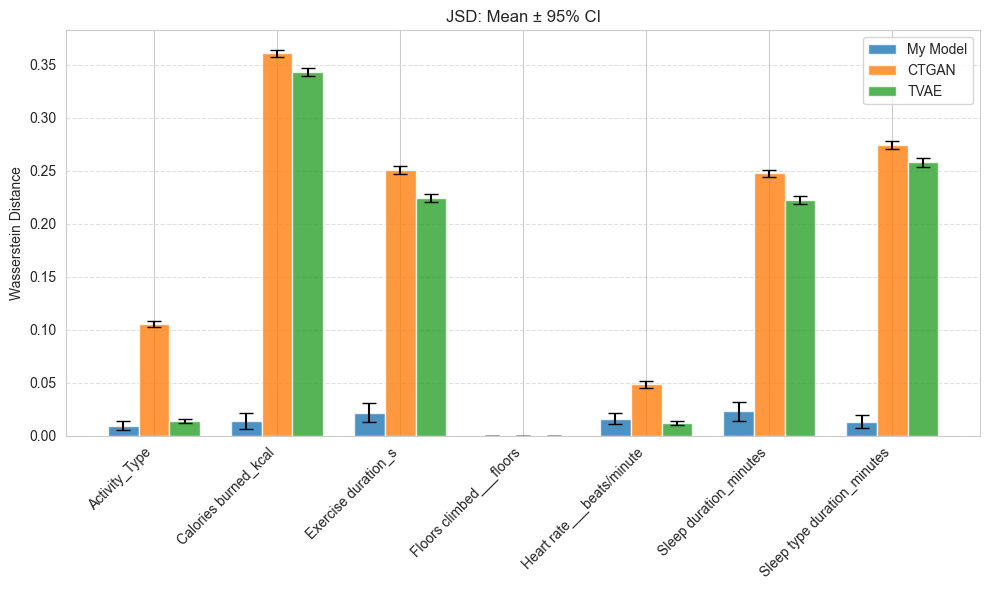

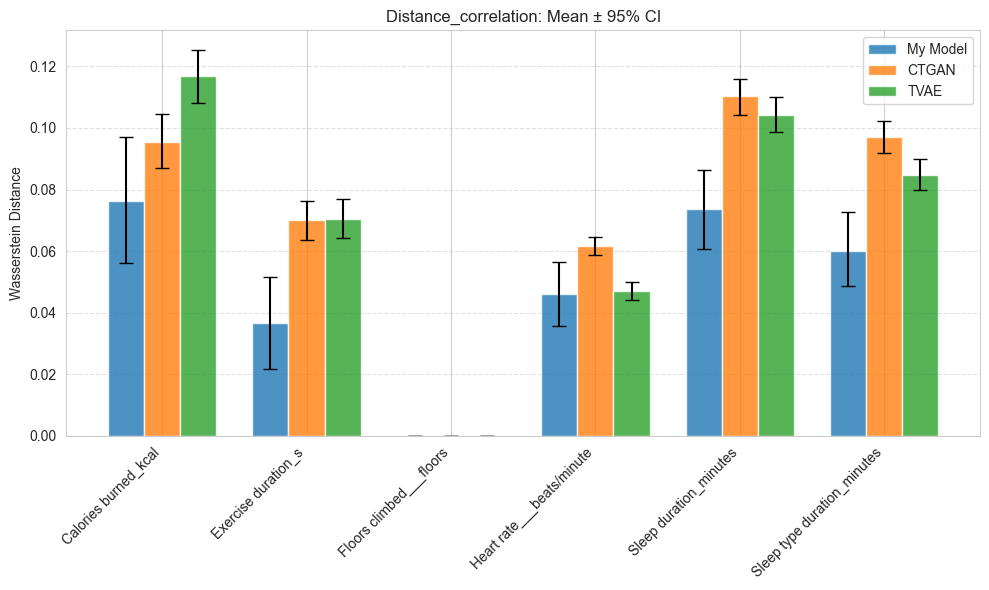

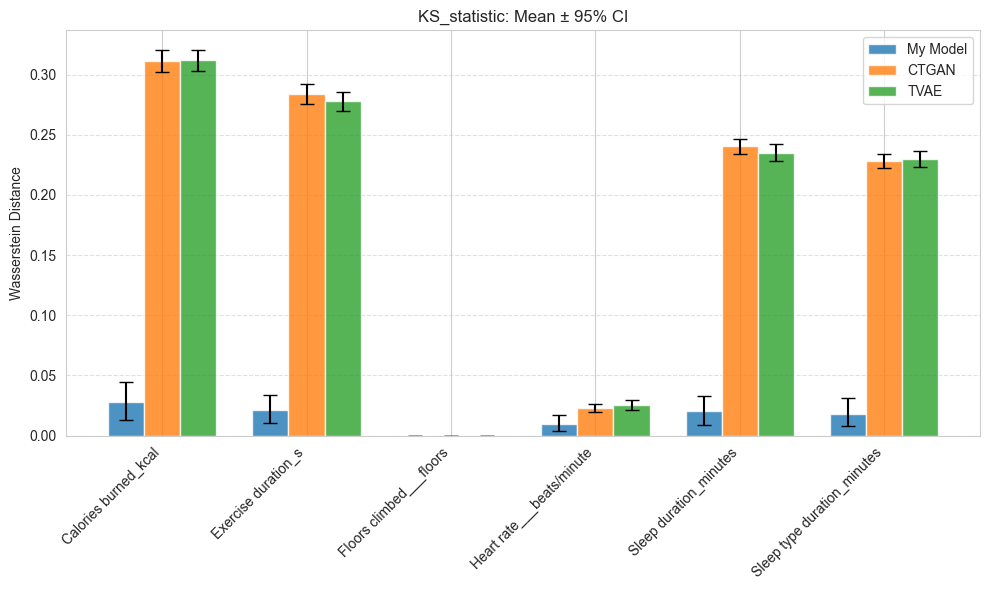

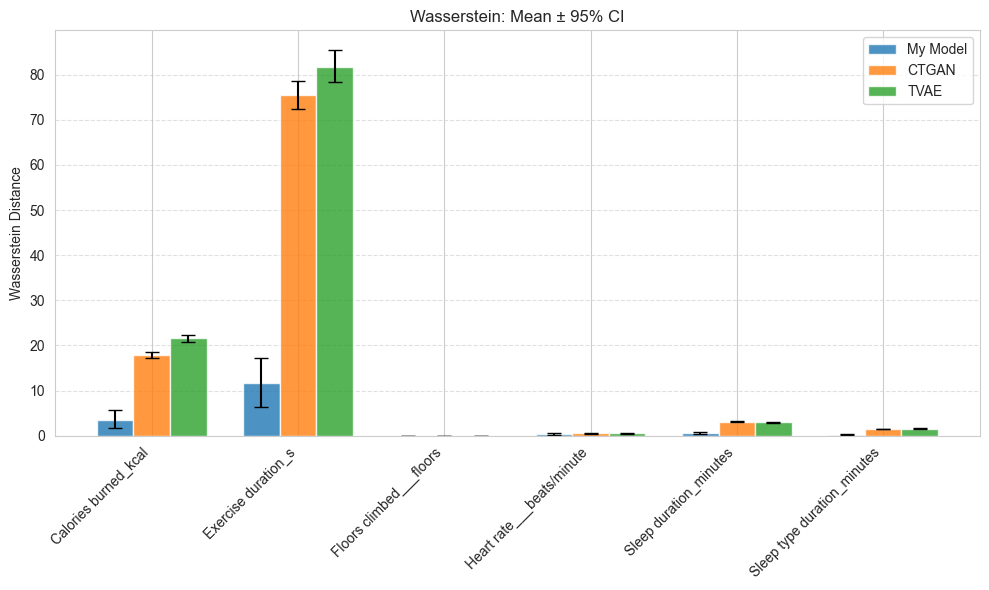

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ====== CONFIG ======
my_model_path = r'C:\Users\Darren\Documents\BHI and Written Qualifier\Benchmark Results\heated_markov_bootstrap_WD_JSD_summary.csv'
ctgan_path = r'C:\Users\Darren\Documents\BHI and Written Qualifier\Benchmark Results\ctgan_bootstrap_WD_JSD_summary.csv'
tvae_path = r'C:\Users\Darren\Documents\BHI and Written Qualifier\Benchmark Results\tvae_bootstrap_WD_JSD_summary.csv'
output_dir = r'bhi_stats_plots'
os.makedirs(output_dir, exist_ok=True)

# ====== LOAD ======
my_model_stats = pd.read_csv(my_model_path)
ctgan_stats = pd.read_csv(ctgan_path)
tvae_stats = pd.read_csv(tvae_path)

# Add model labels
my_model_stats['Model'] = 'My Model'
ctgan_stats['Model'] = 'CTGAN'
tvae_stats['Model'] = 'TVAE'

# Combine and filter for Wasserstein
df = pd.concat([my_model_stats, ctgan_stats, tvae_stats], ignore_index=True)
df = df[df['Distance'] == 'Wasserstein']

# ====== PLOTTING ======
unique_metrics = df['Metric'].unique()

for metric in unique_metrics:
    subset = df[df['Metric'] == metric]

    # Sort by Variable for consistent ordering
    variables = subset['Variable'].unique()
    models = subset['Model'].unique()

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # X locations
    x = np.arange(len(variables))
    width = 0.25

    for i, model in enumerate(models):
        model_data = subset[subset['Model'] == model]

        means = model_data['mean'].values
        ci_low = model_data['95%_CI_low'].values
        ci_high = model_data['95%_CI_high'].values

        # asymmetric error bars
        lower_err = means - ci_low
        upper_err = ci_high - means
        yerr = np.vstack([lower_err, upper_err])

        ax.bar(x + i * width, means, width, label=model, yerr=yerr, capsize=5, alpha=0.8)

    ax.set_xticks(x + width)
    ax.set_xticklabels(variables, rotation=45, ha='right')
    ax.set_ylabel('Wasserstein Distance')
    ax.set_title(f'{metric}: Mean ± 95% CI')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()
    # plt.savefig(os.path.join(output_dir, f'{metric}_wasserstein_barplot.png'), dpi=300)
    # plt.close(fig)

# print(f"✅ Saved bar plots to: {output_dir}")


In [4]:
#Modified to save the distributions instead of just taking means

import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance, ks_2samp, entropy
from scipy.spatial.distance import jensenshannon
from sklearn.metrics import pairwise_distances
import os
import glob

# ========== CONFIGURATION ==========

variables = [
    "heartrate",
    "activity",
    "step_count",
    "activity_duration"
]

# ========== HELPER FUNCTIONS ==========


def compute_jsd(p, q, bins=50):
    """Fast Jensen–Shannon divergence for continuous data."""
    p, q = np.asarray(p, float), np.asarray(q, float)
    hist_range = (min(p.min(), q.min()), max(p.max(), q.max()))
    # Shared bin edges for fair comparison
    edges = np.linspace(hist_range[0], hist_range[1], bins + 1)
    p_hist, _ = np.histogram(p, bins=edges, density=True)
    q_hist, _ = np.histogram(q, bins=edges, density=True)
    p_hist /= p_hist.sum() + 1e-12
    q_hist /= q_hist.sum() + 1e-12
    m = 0.5 * (p_hist + q_hist)
    jsd = 0.5 * (entropy(p_hist, m) + entropy(q_hist, m))
    return np.sqrt(jsd)

def distance_correlation(x, y):
    """Approximate distance correlation using rank-based estimator (linear time)."""
    x, y = np.asarray(x, float), np.asarray(y, float)
    n = min(len(x), len(y))
    if n < 2:
        return np.nan
    x, y = x[:n], y[:n]
    rx = np.argsort(np.argsort(x))
    ry = np.argsort(np.argsort(y))
    cov_xy = np.cov(rx, ry, bias=True)[0, 1]
    stdx = np.std(rx)
    stdy = np.std(ry)
    return 0.0 if stdx * stdy == 0 else cov_xy / (stdx * stdy)
# ========== MAIN COMPARISON FUNCTION ==========
#
# def compare_data(df1, df2, label="comparison", match_datetimes=False, input_type='real'):
#     """Compare two DataFrames and return metric dictionary keyed by metric name."""
#     if any(v not in df1.columns or v not in df2.columns for v in variables):
#         raise ValueError("Both DataFrames must contain all variables of interest.")
#
#     # Handle datetimes
#     if 'Datetime' not in df1.columns or 'Datetime' not in df2.columns:
#         raise ValueError("Both CSVs must contain a 'Datetime' column.")
#     fmt1 = '%Y-%m-%d %H:%M:%S'
#     df1['Datetime'] = pd.to_datetime(df1['Datetime'], errors='coerce', format=fmt1)
#     fmt2= '%Y-%m-%d %H:%M:%S'
#     df2['Datetime'] = pd.to_datetime(df2['Datetime'], errors='coerce', format=fmt2)
#     df1, df2 = df1.dropna(subset=['Datetime']), df2.dropna(subset=['Datetime'])
#     df1 = df1.drop_duplicates(subset=['Datetime'], keep='first')
#     df2 = df2.drop_duplicates(subset=['Datetime'], keep='first')
#     # if match_datetimes:
#     #     df1 = df1[df1['Datetime'].isin(df2['Datetime'])].reset_index(drop=True)
#
#     # Initialize results per metric
#     metric_results = {
#         "Wasserstein": {"Comparison": label},
#         "KS_statistic": {"Comparison": label},
#         "JSD": {"Comparison": label},
#         "Distance_correlation": {"Comparison": label},
#     }
#
#     # Compute per-variable metrics
#     for var in variables:
#         # print(f"Comparing {var}...")
#         x, y = df1[var].dropna(), df2[var].dropna()
#         # print(x.shape, y.shape)
#         if len(x) == 0 or len(y) == 0:
#             for m in metric_results:
#                 metric_results[m][var] = np.nan
#             continue
#
#         if var == "Activity_Type" or x.dtype == object:
#             # Categorical → JSD only
#             p = x.value_counts(normalize=True)
#             q = y.value_counts(normalize=True)
#             common_idx = p.index.union(q.index)
#             p = p.reindex(common_idx, fill_value=0)
#             q = q.reindex(common_idx, fill_value=0)
#             jsd = jensenshannon(p, q)
#             metric_results["JSD"][var] = jsd
#             for m in ["Wasserstein", "KS_statistic", "Distance_correlation"]:
#                 metric_results[m][var] = np.nan
#         else:
#             # Continuous
#             metric_results["Wasserstein"][var] = wasserstein_distance(x, y)
#             metric_results["KS_statistic"][var] = ks_2samp(x, y).statistic
#             metric_results["JSD"][var] = compute_jsd(x, y)
#             metric_results["Distance_correlation"][var] = distance_correlation(x, y)
#
#     return metric_results
def compare_data_fast(df1, df2, variables, label="comparison"):
    """
    Compare two DataFrames of wearable variables using multiple distance metrics.
    Much faster than the original implementation.
    """
    # Initialize results
    metrics = ["Wasserstein", "KS_statistic", "JSD", "Distance_correlation"]
    metric_results = {m: {"Comparison": label} for m in metrics}

    # Ensure valid datetimes and remove duplicates

    for var in variables:
        if var not in df1.columns or var not in df2.columns:
            for m in metrics: metric_results[m][var] = np.nan
            continue

        x, y = df1[var].dropna(), df2[var].dropna()
        if len(x) == 0 or len(y) == 0:
            for m in metrics: metric_results[m][var] = np.nan
            continue

        # Handle categorical variables separately
        if var == "activity" or x.dtype == object:
            p = x.value_counts(normalize=True)
            q = y.value_counts(normalize=True)
            common = p.index.union(q.index)
            p = p.reindex(common, fill_value=0)
            q = q.reindex(common, fill_value=0)
            metric_results["JSD"][var] = jensenshannon(p, q)
            metric_results["Wasserstein"][var] = np.nan
            metric_results["KS_statistic"][var] = np.nan
            metric_results["Distance_correlation"][var] = np.nan
        else:
            xv, yv = x.values, y.values
            metric_results["Wasserstein"][var] = wasserstein_distance(xv, yv)
            metric_results["KS_statistic"][var] = ks_2samp(xv, yv).statistic
            metric_results["JSD"][var] = compute_jsd(xv, yv)
            metric_results["Distance_correlation"][var] = distance_correlation(xv, yv)

    return metric_results

# ========== CSV SAVING UTILITY ==========

def save_metric_csvs(all_metric_results, output_dir="metric_results"):
    """
    Combine all comparison results and save one CSV per metric.
    all_metric_results: list of dicts returned by compare_data()
    """
    os.makedirs(output_dir, exist_ok=True)

    metrics = ["Wasserstein", "KS_statistic", "JSD", "Distance_correlation"]

    for metric in metrics:
        df_metric = pd.DataFrame([r[metric] for r in all_metric_results])
        df_metric.to_csv(os.path.join(output_dir, f"{metric}_results.csv"), index=False)
        print(f"Saved {metric}_results.csv with {len(df_metric)} comparisons.")


# ========== EXAMPLE USAGE ==========
# for warmup in warmup_grid:
#     for alpha in alpha_grid:
#         print(f"alpha: {alpha}, warmup: {warmup}")
# synth_dir = f"sim_alpha_{alpha}_warmup_{warmup}"
synth_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\zufferey_synth_data'
print(f"synth_dir: {synth_dir}")
output_dir = f"results_final_rev_hhmm_zufferey"
os.makedirs(output_dir, exist_ok=True)
i=0
for file1 in glob.glob(os.path.join(synth_dir, '*.csv')):
    j=0
    synth_df_1 = pd.read_csv(file1)
    for file2 in glob.glob(os.path.join(synth_dir, '*.csv')):
        if file1 == file2:
            continue
        synth_df_2 = pd.read_csv(file2)
        # synth_df_1['Activity_Type'] = synth_df_1['Activity_Type'].map(activity_state_dict_inverse)
        # synth_df_2['Activity_Type'] = synth_df_2['Activity_Type'].map(activity_state_dict_inverse)
        results_df = pd.DataFrame(compare_data_fast(synth_df_1, synth_df_2, variables, label=f"{i}_vs_{i}"))
        results_df.to_csv(os.path.join(output_dir, f"{i}_vs_{j}.csv"))
        j+=1
    i+=1
#
#
#
#
# os.makedirs(output_dir, exist_ok=True)
# synth_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\sim_alpha_0_warmup_0'
# self_comparison_result_list = []
# activity_state_dict_inverse = {val:key for key, val in activity_state_dict.items()}
# for i in range(len(data)):
#     # for j in range(i+1, len(data)):
#     #     print(f"Comparing {i} to {j}")
#     #     df = data[i].copy()
#     #     ref_df = data[j].copy()
#     #     df['Activity_Type'] = df['Activity_Type'].map(activity_state_dict_inverse)
#     #     ref_df['Activity_Type'] = ref_df['Activity_Type'].map(activity_state_dict_inverse)
#     #     results_df = pd.DataFrame(compare_data(df, ref_df, label=f"{i}_vs_{j}", input_type='real'))
#     #     results_df.to_csv(os.path.join(output_dir, f"{i}_vs_{j}.csv"))
#     #     self_comparison_result_list.append(results_df)
#     j = 0
#     for file in glob.glob(os.path.join(synth_dir, '*.csv')):
#         print(f'Comparing {i} to {j}')
#         ref_df = data[i].copy()
#         synth_df = pd.read_csv(file)
#         synth_df['Activity_Type'] = synth_df['Activity_Type'].map(activity_state_dict_inverse)
#         ref_df['Activity_Type'] = ref_df['Activity_Type'].map(activity_state_dict_inverse)
#         results_df = pd.DataFrame(compare_data(synth_df, ref_df, label=f"{i}_vs_{j}", match_datetimes = True, input_type='synth'))
#         # print(results_df)
#         results_df.to_csv(os.path.join(output_dir, f"{i}_vs_{j}.csv"))
#         j+=1
#


synth_dir: C:\Users\Darren\Documents\BHI and Written Qualifier\zufferey_synth_data


In [3]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

# ========= CONFIGURATION =========
reference_dir = (r'C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan\reference\comparison_summary_zufferey')
evaluation_dir = r'C:\Users\Darren\Documents\BHI and Written Qualifier\ctgan\results_final_rev_tvae_zufferey'
n_boot = 1000
n_sample = 1000  # number of CSVs sampled per bootstrap
output_csv = 'tvae_bootstrap_WD_summary_fitbit.csv'

metric_files = [
    "Wasserstein_results.csv",
    "JSD_results.csv",
    "KS_results.csv",
    "DistCorr_results.csv"
]

# ========= HELPER FUNCTIONS =========
def load_metric_csv(path):
    """Load a metric CSV and drop non-numeric rows."""
    df = pd.read_csv(path, index_col=0)
    df = df.dropna(how='all')
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

def summarize_bootstrap(df):
    """Compute summary stats for WD/JSD results."""
    summary = (
        df.groupby(['Variable', 'Metric'])
          .agg(['mean', 'std', 'median',
                lambda x: x.quantile(0.25),
                lambda x: x.quantile(0.75),
                np.min,
                np.max,  # range
                lambda x: np.percentile(x, 2.5),  # 95% CI low
                lambda x: np.percentile(x, 97.5)])  # 95% CI high
    )
    summary.columns = ['mean', 'std', 'median','IQR_25', 'IQR_75', 'min', 'max', '95%_CI_low', '95%_CI_high']
    return summary.reset_index()

def compute_jsd(p, q, bins=50):
    """Compute Jensen–Shannon distance between continuous samples."""
    if len(p) == 0 or len(q) == 0:
        return np.nan
    min_v = min(np.min(p), np.min(q))
    max_v = max(np.max(p), np.max(q))
    if not np.isfinite(min_v) or not np.isfinite(max_v) or min_v == max_v:
        return np.nan
    hist_p, _ = np.histogram(p, bins=bins, range=(min_v, max_v), density=True)
    hist_q, _ = np.histogram(q, bins=bins, range=(min_v, max_v), density=True)
    hist_p += 1e-12
    hist_q += 1e-12
    hist_p /= hist_p.sum()
    hist_q /= hist_q.sum()
    return jensenshannon(hist_p, hist_q)

# ========= LOAD REFERENCE METRIC FILES =========
ref_metrics = {}
for mfile in metric_files:
    metric_name = mfile.split("_")[0]  # e.g., "Wasserstein" from "Wasserstein_results.csv"
    path = os.path.join(reference_dir, mfile)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Reference file not found: {path}")
    if metric_name == 'DistCorr':
        metric_name = 'Distance_correlation'
    if metric_name == 'KS':
        metric_name = 'KS_statistic'
    ref_metrics[metric_name] = load_metric_csv(path)

print(f"Loaded reference metrics: {list(ref_metrics.keys())}")

# ========= LOAD EVALUATION FILES =========
eval_files = [
    load_metric_csv(os.path.join(evaluation_dir, f))
    for f in os.listdir(evaluation_dir)
    if f.endswith('.csv') and '_vs_' in f
]

if len(eval_files) == 0:
    raise ValueError("No evaluation {i}_vs_{j}.csv files found in the directory.")

# ========= DETERMINE COMMON VARIABLES =========
common_vars = list(set.intersection(*[set(df.columns) for df in ref_metrics.values()]))
print(f"Found {len(common_vars)} variables shared across all reference metrics.")

# ========= BOOTSTRAP COMPARISON =========
records = []

for i in tqdm(range(n_boot), desc="Bootstrapping WD/JSD"):
    eval_sample_idxs = np.random.choice(len(eval_files), size=n_sample, replace=True)

    for metric_name, ref_df in ref_metrics.items():
        ref_vals_all = ref_df[common_vars]
        ref_vals_all = ref_vals_all.select_dtypes(include=[np.number])

        for var in common_vars:
            ref_vals = ref_vals_all[var].dropna().values
            if len(ref_vals) < 2:
                continue

            # Gather corresponding metric column from sampled eval files
            eval_vals = []
            for idx in eval_sample_idxs:
                try:
                    eval_df = eval_files[idx]
                    if metric_name in eval_df.columns and var in eval_df.index:
                        val = eval_df.at[var, metric_name]
                        if np.isfinite(val):
                            eval_vals.append(val)
                except Exception:
                    continue

            if len(eval_vals) < 2:
                continue

            eval_vals = np.array(eval_vals, dtype=float)
            ref_vals = np.array(ref_vals, dtype=float)

            # Compute WD and JSD between the bootstrap-sampled distributions
            wd = wasserstein_distance(ref_vals, eval_vals)
            jsd = compute_jsd(ref_vals, eval_vals)

            records.append({
                "Variable": var,
                "Metric": metric_name,
                "Wasserstein": wd
                # "JSD": jsd
            })

# ========= SUMMARIZE =========
df_results = pd.DataFrame(records)

summary_wd = summarize_bootstrap(
    df_results[['Variable', 'Metric', 'Wasserstein']].rename(columns={'Wasserstein': 'Value'})
)
# summary_jsd = summarize_bootstrap(
#     df_results[['Variable', 'Metric', 'JSD']].rename(columns={'JSD': 'Value'})
# )

summary_wd['Distance'] = 'Wasserstein'
# summary_jsd['Distance'] = 'JSD'

summary = summary_wd
# summary = pd.concat([summary_wd, summary_jsd], ignore_index=True)
summary = summary[['Variable', 'Metric', 'Distance','mean', 'std', 'median','IQR_25', 'IQR_75', 'min', 'max', '95%_CI_low', '95%_CI_high']]

# ========= SAVE =========
summary.to_csv(output_csv, index=False)
print(f"\n✅ Bootstrap WD/JSD summary saved to {output_csv}")
print(summary.head(15))

Loaded reference metrics: ['Wasserstein', 'JSD', 'KS_statistic', 'Distance_correlation']
Found 4 variables shared across all reference metrics.


Bootstrapping WD/JSD: 100%|██████████| 1000/1000 [01:19<00:00, 12.56it/s]


✅ Bootstrap WD/JSD summary saved to tvae_bootstrap_WD_summary_fitbit.csv
             Variable                Metric     Distance       mean       std  \
0            activity                   JSD  Wasserstein   0.505847  0.000080   
1   activity_duration  Distance_correlation  Wasserstein   0.135514  0.000229   
2   activity_duration                   JSD  Wasserstein   0.471466  0.000073   
3   activity_duration          KS_statistic  Wasserstein   0.262622  0.000078   
4   activity_duration           Wasserstein  Wasserstein  14.781223  0.001803   
5           heartrate  Distance_correlation  Wasserstein   0.142727  0.000244   
6           heartrate                   JSD  Wasserstein   0.472911  0.000078   
7           heartrate          KS_statistic  Wasserstein   0.325283  0.000074   
8           heartrate           Wasserstein  Wasserstein   8.762002  0.001586   
9          step_count  Distance_correlation  Wasserstein   0.200439  0.000235   
10         step_count              


C:\Users\Darren\AppData\Local\Temp\ipykernel_28468\3214713695.py:34: FutureWarning: The provided callable <function min at 0x00000276F35B2C20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg(['mean', 'std', 'median',
C:\Users\Darren\AppData\Local\Temp\ipykernel_28468\3214713695.py:34: FutureWarning: The provided callable <function max at 0x00000276F35B2B00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg(['mean', 'std', 'median',
